# Relatório de Análise VII

## Criando Agrupamentos

In [4]:
import pandas as pd

In [5]:
dados = pd.read_csv('aluguel_residencial.csv', sep = ';')

In [6]:
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento


In [7]:
dados['Valor'].mean()

5159.318636548821

In [8]:
bairros = ['Barra da Tijuca', 'Copacabana', 'Ipanema', 'Leblon', 'Botafogo', 'Flamengo', 'Tijuca']
selecao = dados['Bairro'].isin(bairros)
dados = dados[selecao]

In [9]:
dados['Bairro'].drop_duplicates()

0          Copacabana
5     Barra da Tijuca
15             Tijuca
19            Ipanema
23           Botafogo
27             Leblon
79           Flamengo
Name: Bairro, dtype: object

In [10]:
grupo_bairro = dados.groupby('Bairro')

In [11]:
for bairro, dados in grupo_bairro: 
    print(bairro)

Barra da Tijuca
Botafogo
Copacabana
Flamengo
Ipanema
Leblon
Tijuca


In [12]:

for bairro, dados in grupo_bairro: 
    print('{} -> {}'.format(bairro, dados.Valor.mean()))

Barra da Tijuca -> 7089.933523021211
Botafogo -> 9328.872881355932
Copacabana -> 4137.687429218573
Flamengo -> 4146.934265734266
Ipanema -> 9525.7616638561
Leblon -> 8791.985714285714
Tijuca -> 2133.7865470852016


In [13]:
grupo_bairro['Valor'].mean()

Bairro
Barra da Tijuca    7089.933523
Botafogo           9328.872881
Copacabana         4137.687429
Flamengo           4146.934266
Ipanema            9525.761664
Leblon             8791.985714
Tijuca             2133.786547
Name: Valor, dtype: float64

In [14]:
grupo_bairro[['Valor', 'Condominio']].mean().round(2)

,Valor,Condominio
Bairro,,
Barra da Tijuca,7089.93,3588.23
Botafogo,9328.87,905.31
Copacabana,4137.69,1147.00
Flamengo,4146.93,1100.61
Ipanema,9525.76,2230.64
Leblon,8791.99,2104.63
Tijuca,2133.79,702.12


## Estatísticas Descritivas

In [15]:
grupo_bairro['Valor'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
Barra da Tijuca,3866.0,7089.93,11914.52,800.0,2500.0,4500.0,8500.0,600000.0
Botafogo,944.0,9328.87,146382.98,700.0,2300.0,3200.0,4650.0,4500000.0
Copacabana,2649.0,4137.69,3627.79,100.0,2000.0,3000.0,4800.0,35000.0
Flamengo,715.0,4146.93,3939.06,800.0,1900.0,2900.0,5000.0,35000.0
Ipanema,1779.0,9525.76,8706.01,1200.0,4500.0,7000.0,11500.0,100000.0
Leblon,1260.0,8791.99,7092.24,100.0,4500.0,7000.0,10500.0,100000.0
Tijuca,1115.0,2133.79,1896.81,750.0,1500.0,1800.0,2300.0,45000.0


In [16]:
grupo_bairro['Valor'].aggregate(['min', 'max', 'sum'])

,min,max,sum
Bairro,,,
Barra da Tijuca,800.0,600000.0,27409683.0
Botafogo,700.0,4500000.0,8806456.0
Copacabana,100.0,35000.0,10960734.0
Flamengo,800.0,35000.0,2965058.0
Ipanema,1200.0,100000.0,16946330.0
Leblon,100.0,100000.0,11077902.0
Tijuca,750.0,45000.0,2379172.0


In [17]:
grupo_bairro['Valor'].aggregate(['min', 'max', 'sum']).rename(columns = {'min': 'Mínimo', 'max': 'Máximo'})

,Mínimo,Máximo,sum
Bairro,,,
Barra da Tijuca,800.0,600000.0,27409683.0
Botafogo,700.0,4500000.0,8806456.0
Copacabana,100.0,35000.0,10960734.0
Flamengo,800.0,35000.0,2965058.0
Ipanema,1200.0,100000.0,16946330.0
Leblon,100.0,100000.0,11077902.0
Tijuca,750.0,45000.0,2379172.0


In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (20,10))

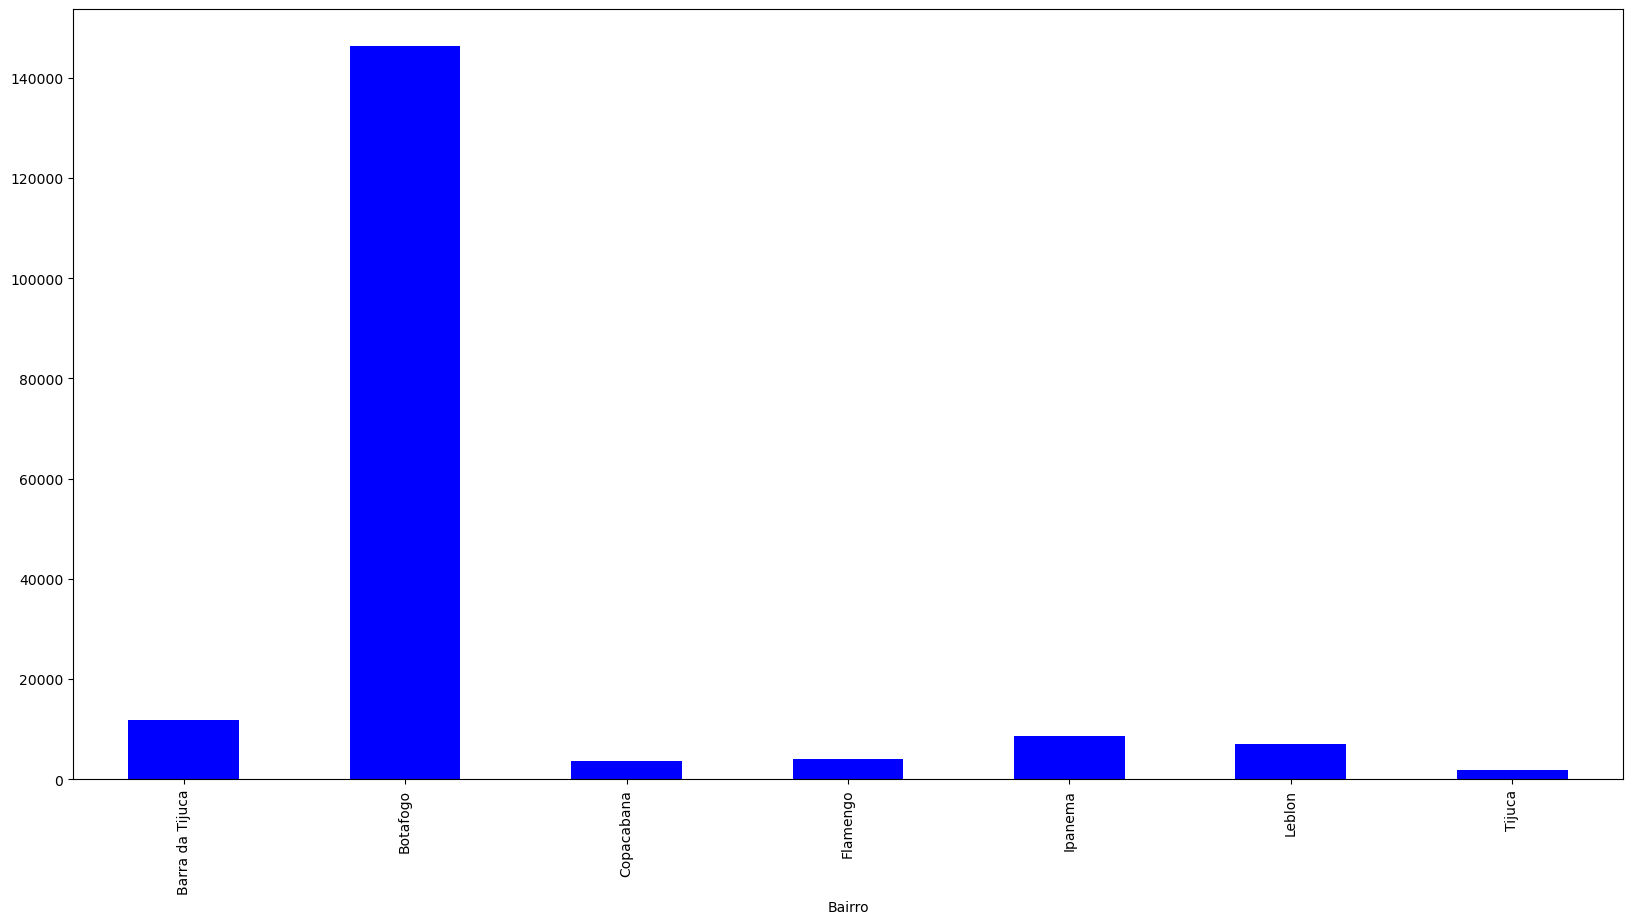

In [19]:
fig = grupo_bairro['Valor'].std().plot.bar(color = 'blue')

Text(0.5, 1.0, 'Valor Médio do Aluguel por Bairro')

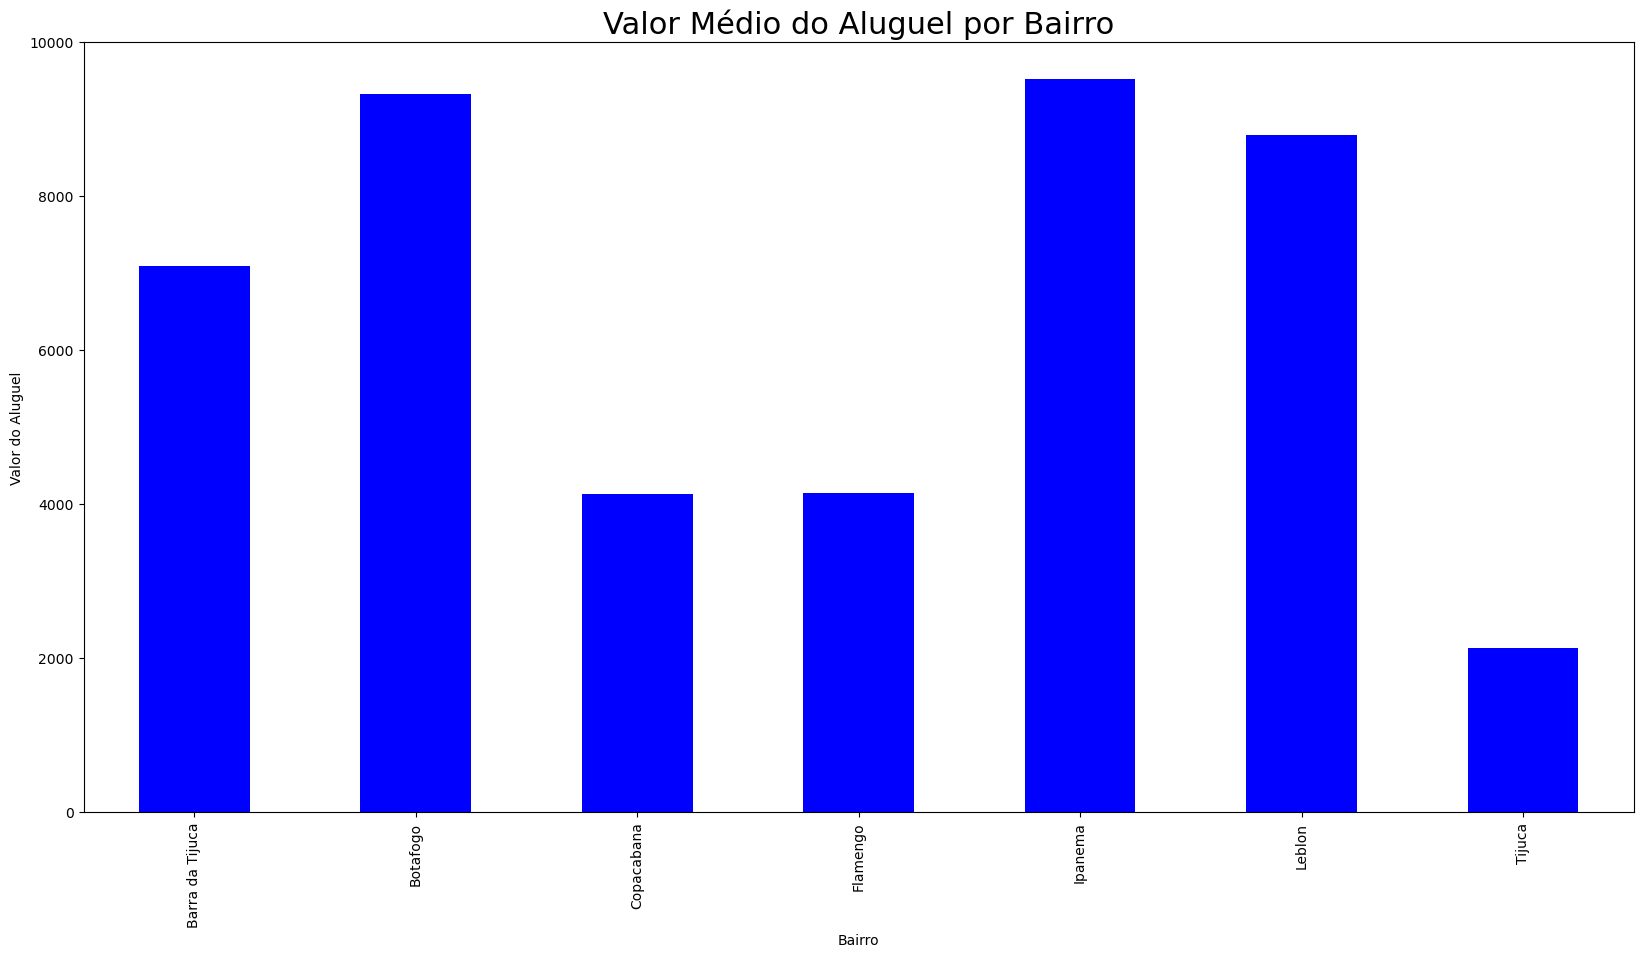

In [20]:
fig = grupo_bairro['Valor'].mean().plot.bar(color = 'blue')
fig.set_ylabel('Valor do Aluguel')
fig.set_title('Valor Médio do Aluguel por Bairro', {'fontsize': 22})